<a href="https://colab.research.google.com/github/Barasinghaa/Image_caption_genrator/blob/main/Captions_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install streamlit -q
!pip install transformers

In [19]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

In [20]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

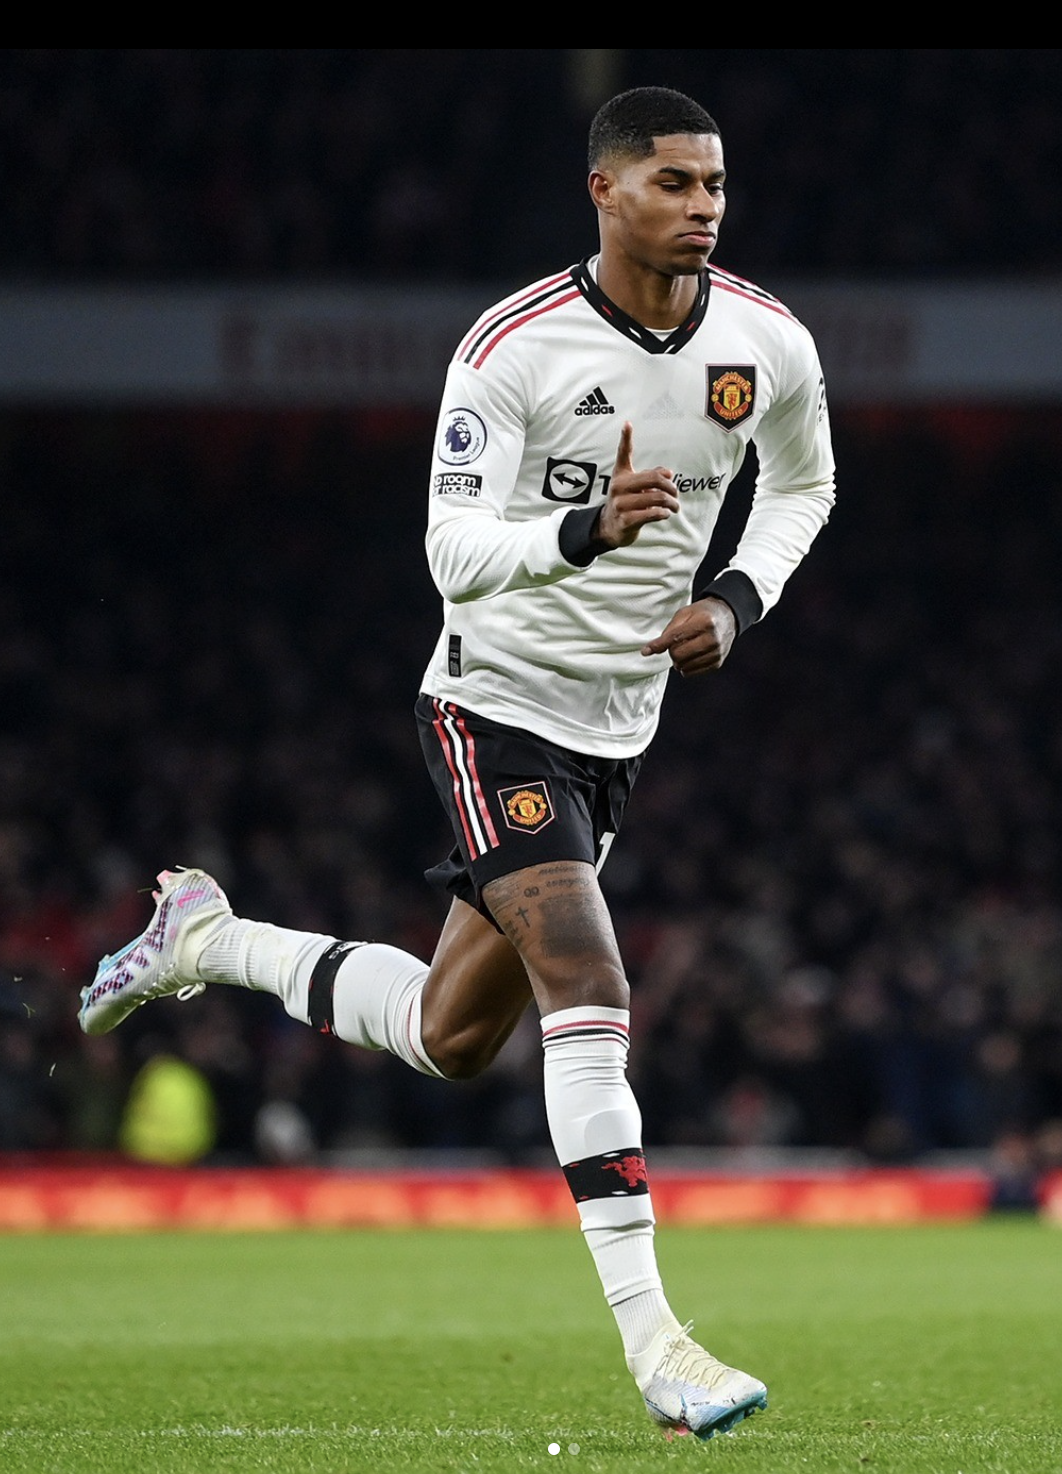

In [21]:
Image.open("Image1.png")

In [22]:
predict_step(['Image1.png'])

['a man kicking a soccer ball on a field']

In [23]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(feature_extractor, open("feature.pkl", "wb"))
pickle.dump(tokenizer, open("token.pkl", "wb"))

In [24]:
%%writefile app.py
import streamlit as st
import pickle
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image
import time
import cv2

st.title("Image Caption Genrator")

uploaded_file = st.file_uploader("Upload your file here...", type=['png', 'jpeg', 'jpg'])

if uploaded_file is not None:
    st.image(uploaded_file)
    st.write("Image Uploaded Successfully")

time.sleep(25)

model = pickle.load(open("model.pkl", "rb"))
feature_extractor = pickle.load(open("feature.pkl", "rb"))
tokenizer = pickle.load(open("token.pkl", "rb"))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

caption=predict_step([uploaded_file])
st.subheader("Caption of the image :")
st.write(caption)


Overwriting app.py


In [25]:
!python -m streamlit run app.py & npx localtunnel --port 8501

[##................] / fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.142.241.216:8501

npx: installed 22 in 3.101s
your url is: https://giant-mammals-invite.loca.lt
2023-08-03 07:57:06.388807: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-03 07:57:34.418 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3231, in open
    fp.seek(0)
AttributeError: 'NoneType' object has no attribute 'seek'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 552, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 48, in <module>
    caption=predict_step([uploade